# DataWorkshop Warsaw SMOG Project
---

### 1. Regularyzacja Ridge
### 2. Regularyzacja Lasso

    Z wykorzystaniem Pipepline, GridSearchCV
Pipeline: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

GridSearchCV: https://scikit-learn.org/stable/modules/grid_search.html


In [1]:
# Importowanie bibliotek
import numpy as np
import pandas as pd

# Zmiana domyslnej ilości wyświetlanych kolumn i wierszy
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# Biblioteki graficzne
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10 # Zmiana domyślnego rozmiaru figur
import seaborn as sns

# scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [2]:
# Wczytanie danych
df = pd.read_csv('pm25.csv',index_col = 0, header = 0)
df = df.drop('pm25lag', axis = 1) # Usunięcie zmiennej pm25 opóźnionej
df.head()

,Rok,Miesiąc,Dzień,Godzina,Wysokość_podstawy_niższej_[m],Wysokość_podstawy_wyższej_[m],Widzialność_operatora_[m],Widzialność_automat_[m],Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Poryw_wiatru_[m/s],Temperatura_powietrza_[°C],Temperatura_termometru_zwilżonego_[°C],Ciśnienie_pary_wodnej_[hPa],Wilgotność_względna_[%],Temperatura_punktu_rosy_[°C],Ciśnienie_na_pozimie_stacji_[hPa],Ciśnienie_na_pozimie_morza_[hPa],Wartość_tendencji_[wartość],Opad_za_6_godzin_[mm],Status_pomiaru_WO6G,Status_pomiaru_ROPT,Zachmurzenie_niskie_[oktanty],Niedosyt_wilgotności_[hPa},Usłonecznienie,Poryw_maksymalny_za_okres_WW_[m/s],Temperatura_gruntu_-5_[°C],Temperatura_gruntu_-10_[°C],Temperatura_gruntu_-20_[°C],Temperatura_gruntu_-50_[°C],Temperatura_gruntu_-100_[°C],Status_pomiaru_TG100,Temperatura_minimalna_za_12_godzin_[°C],Status_pomiaru_TMIN,Temperatura_maksymalna_za_12_godzin_[°C],Status_pomiaru_TMAX,Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C],Status_pomiaru_TGMI,Równoważnik_wodny_śniegu_[mm/cm],Status_pomiaru_RWSN,Wysokość_pokrywy_śnieżnej_[cm],Status_pomiaru_PKSN,Wysokość_świeżo_spadłego_śniegu_[cm],Wysokość_śniegu_na_poletku_[cm],Wysokość_próbki_[cm],Ciężar_próbki_[g],Niepodległości,dzien_tygodnia
2014-01-01 01:00:00,2014.0,1.0,1.0,1.0,210.0,0.0,7000.0,0.0,8.0,119.0,4.0,0.0,1.0,0.0,6.1,93.0,0.0,1009.5,1023.0,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,100.325798,3
2014-01-01 02:00:00,2014.0,1.0,1.0,2.0,210.0,0.0,7000.0,0.0,8.0,128.0,4.0,0.0,1.2,0.0,6.1,92.0,0.0,1009.0,1022.5,-1.0,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,69.412430,3
2014-01-01 03:00:00,2014.0,1.0,1.0,3.0,210.0,0.0,7000.0,0.0,8.0,134.0,3.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.6,1022.1,-1.2,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,40.967861,3
2014-01-01 04:00:00,2014.0,1.0,1.0,4.0,210.0,0.0,7000.0,0.0,8.0,129.0,4.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.2,1021.7,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,37.308937,3
2014-01-01 05:00:00,2014.0,1.0,1.0,5.0,210.0,0.0,7000.0,0.0,8.0,137.0,4.0,0.0,1.3,0.0,6.1,91.0,0.0,1008.2,1021.7,-0.8,0.0,8.0,8.0,7.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,38.185955,3


In [3]:
# Tworzenie listy wszystkich cech / kolumn
feats_all = list(df.drop('Niepodległości',axis=1))
print(feats_all, end=' ') # end='' pozwala na printowanie bez newline

['Rok', 'Miesiąc', 'Dzień', 'Godzina', 'Wysokość_podstawy_niższej_[m]', 'Wysokość_podstawy_wyższej_[m]', 'Widzialność_operatora_[m]', 'Widzialność_automat_[m]', 'Zachmurzenie_ogólne_[oktanty]', 'Kierunek_wiatru_[°]', 'Prędkość_wiatru_[m/s]', 'Poryw_wiatru_[m/s]', 'Temperatura_powietrza_[°C]', 'Temperatura_termometru_zwilżonego_[°C]', 'Ciśnienie_pary_wodnej_[hPa]', 'Wilgotność_względna_[%]', 'Temperatura_punktu_rosy_[°C]', 'Ciśnienie_na_pozimie_stacji_[hPa]', 'Ciśnienie_na_pozimie_morza_[hPa]', 'Wartość_tendencji_[wartość]', 'Opad_za_6_godzin_[mm]', 'Status_pomiaru_WO6G', 'Status_pomiaru_ROPT', 'Zachmurzenie_niskie_[oktanty]', 'Niedosyt_wilgotności_[hPa}', 'Usłonecznienie', 'Poryw_maksymalny_za_okres_WW_[m/s]', 'Temperatura_gruntu_-5_[°C]', 'Temperatura_gruntu_-10_[°C]', 'Temperatura_gruntu_-20_[°C]', 'Temperatura_gruntu_-50_[°C]', 'Temperatura_gruntu_-100_[°C]', 'Status_pomiaru_TG100', 'Temperatura_minimalna_za_12_godzin_[°C]', 'Status_pomiaru_TMIN', 'Temperatura_maksymalna_za_12_godzi

In [4]:
# Stara lista wykorzystywana w XGBoost
# Tutaj wybieramy wszystkie cechy(kolumny) - które redukuje potem ridge i lasso

feats = ['Rok', 'Miesiąc', 'Dzień', 'Godzina',
         'Zachmurzenie_ogólne_[oktanty]',
         'Kierunek_wiatru_[°]',
         'Prędkość_wiatru_[m/s]',
         'Temperatura_powietrza_[°C]',
         'Wilgotność_względna_[%]',
         'Ciśnienie_na_pozimie_stacji_[hPa]',
         'Ciśnienie_na_pozimie_morza_[hPa]',
         'dzien_tygodnia']

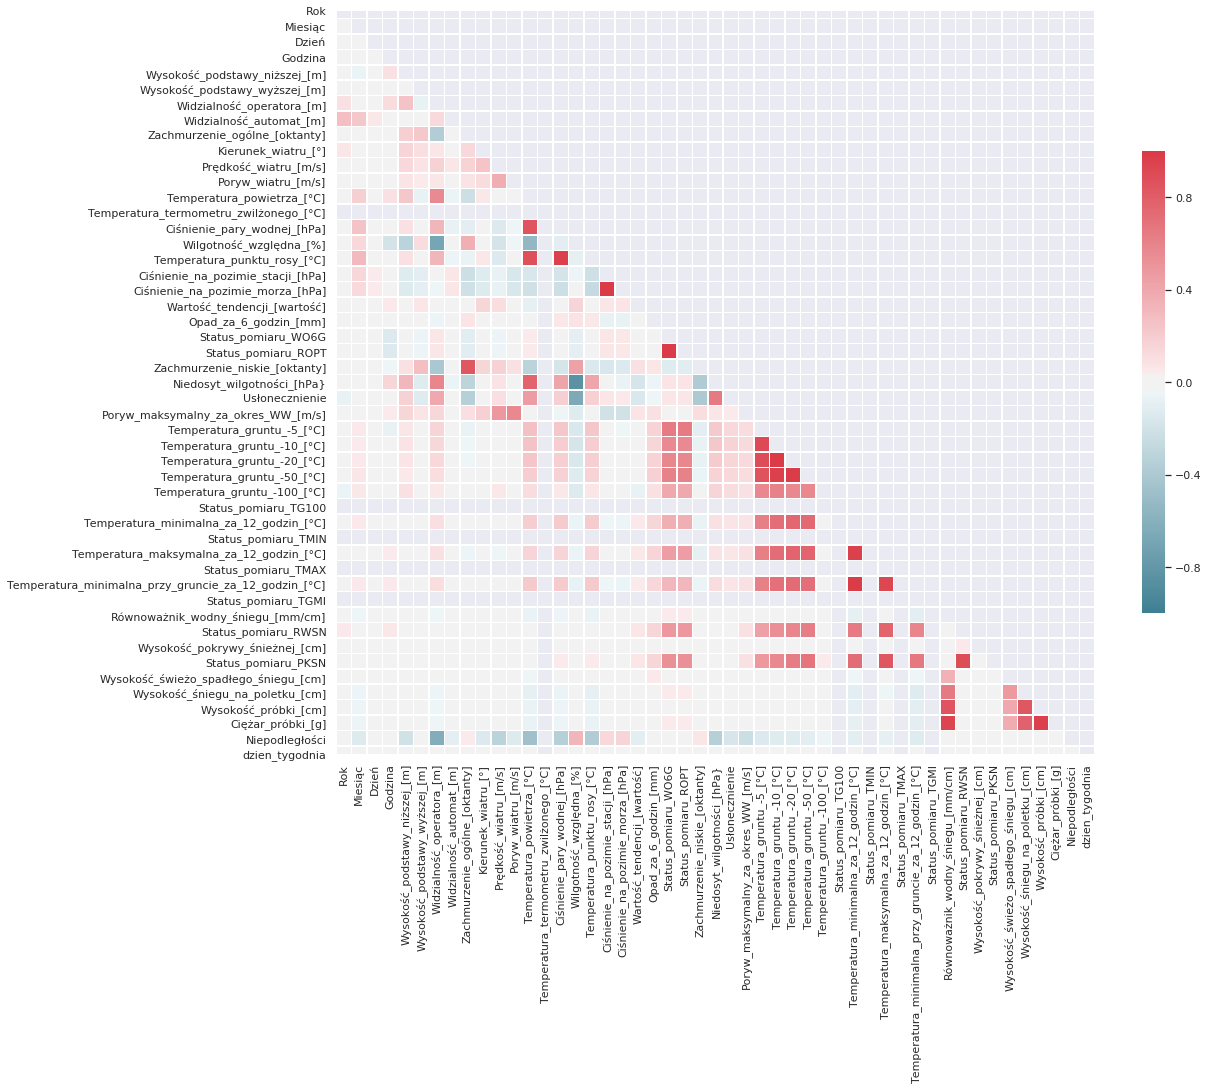

In [5]:
# Tworzenie heatmapy korelacji cech
sns.set(style="darkgrid")
corr = df.corr()

# Generowanie maski do przysłonięcia górnego trójkąta
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Ustawienie rozmiaru figury
f, ax = plt.subplots(figsize=(17,17))

# Niestandardowa mapa kolorów
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmapa
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=0.5, cbar_kws={"shrink": 0.5}, ax=ax)

plt.show()

In [6]:
# Podział na features(X): zmienne niezależne i label(y): zmienną zalezną

X = df[feats_all].values
y = df['Niepodległości']

In [7]:
# Podział na zbiory train 70% i test 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)
print(X_train.shape); print(X_test.shape)

(30676, 48)
(13148, 48)


---
### Funkcje do oceny modeli

##### r2, negative mean squared error, negative median absolute error, 
##### r2 adjusted
##### r2-r2_adj

r_adjusted wzór:
$$r^2_{adj}=1-(1-r^2)*{n-1\over{n-p-1}}$$
* N - liczba punktów w próbce danych, liczba obserwacji (rows).
* K - jest liczbą zmiennych w modelu, z wyłączeniem stałej - liczba cech (columns).

In [8]:
# Funkcja calc_results do oceny modelu
# r2, negative mean squared error, negative median absolute error. Oceny razem z kroswalidacją
# r2_adjusted oraz różnica pomiedzy r2 a r2_adj

def calc_results(model):
    results_cv = {}
    results_cv['r2'] = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='r2', cv=10).mean()
    results_cv['mse'] = -cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_mean_squared_error', cv=10).mean()
    results_cv['mae'] = -cross_val_score(estimator=model, X=X_train, y=y_train, scoring='neg_median_absolute_error', cv=10).mean()
    results_cv['r2_adj'] = (1 - (1 - results_cv['r2']) * ((X_train.shape[0] - 1) / (X_train.shape[0] - X_train.shape[1] - 1)))
    results_cv['r2-r2_adj'] = results_cv['r2'] - results_cv['r2_adj']
    
    return results_cv

##### Mean squared error train / test

In [9]:
# Funkcja train_test_score do oceny modelu
# Mean squared error train / test
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train_test_score(model):
    
    pred_train_model= model.predict(X_train)
    pred_test_model= model.predict(X_test)
    
    train_error = np.sqrt(mean_squared_error(y_train,pred_train_model))
    train_r2 = r2_score(y_train, pred_train_model)
    
    test_error = np.sqrt(mean_squared_error(y_test,pred_test_model))
    test_r2 = r2_score(y_test, pred_test_model)
    
    return print("Train\nMSE: {}\nr2: {}\n -----------------\nTest\nMSE: {}\nr2: {}".format(train_error,train_r2,test_error,test_r2))

---
### Model Regresji Liniowej

In [10]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
calc_results(lm1)

{'r2': 0.5515953310522252,
 'mse': 137.48947315839058,
 'mae': 6.640461285109143,
 'r2_adj': 0.5508925712615342,
 'r2-r2_adj': 0.0007027597906910099}

In [12]:
train_test_score(lm1)

Train
MSE: 11.70419276094364
r2: 0.553337040764478
 -----------------
Test
MSE: 11.90169870743453
r2: 0.5474827641523637


---
### Regresja Ridge

Ridge przeprowadza Regularyzację L2

    Nastepna komórka długo się liczy!

In [13]:
# Regresja Ridge dla różnych parametrów alpha

#  alpha=0.01
ridge001 = Ridge(alpha=0.01)
ridge001.fit(X_train,y_train)
results_ridge_cv001 = calc_results(ridge001)

# alpha=0.1
ridge01 = Ridge(alpha=0.1)
ridge01.fit(X_train,y_train)
results_ridge_cv01 = calc_results(ridge01)

# alpha=10
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train,y_train)
results_ridge_cv10 = calc_results(ridge10)

# alpha=100
ridge100 = Ridge(alpha=100)
ridge100.fit(X_train,y_train)
results_ridge_cv100 = calc_results(ridge100)

print('Ridge alpha = 0.01: {}\nRidge alpha = 0.1: {}\nRidge alpha = 10: {}\nRidge alpha = 100: {}'.format(results_ridge_cv001,results_ridge_cv01,results_ridge_cv10,results_ridge_cv100))


Ridge alpha = 0.01: {'r2': 0.5515955701113635, 'mse': 137.48939772681265, 'mae': 6.640431749934021, 'r2_adj': 0.5508928106953366, 'r2-r2_adj': 0.0007027594160269324}
Ridge alpha = 0.1: {'r2': 0.551597660500617, 'mse': 137.48873797760882, 'mae': 6.640209320887723, 'r2_adj': 0.5508949043607414, 'r2-r2_adj': 0.0007027561398755822}
Ridge alpha = 10: {'r2': 0.551681405876854, 'mse': 137.46199088301196, 'mae': 6.628607503844866, 'r2_adj': 0.5509787809864661, 'r2-r2_adj': 0.0007026248903878596}
Ridge alpha = 100: {'r2': 0.5517039390154219, 'mse': 137.45284738791628, 'mae': 6.638760230119518, 'r2_adj': 0.5510013494399735, 'r2-r2_adj': 0.0007025895754484424}


/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


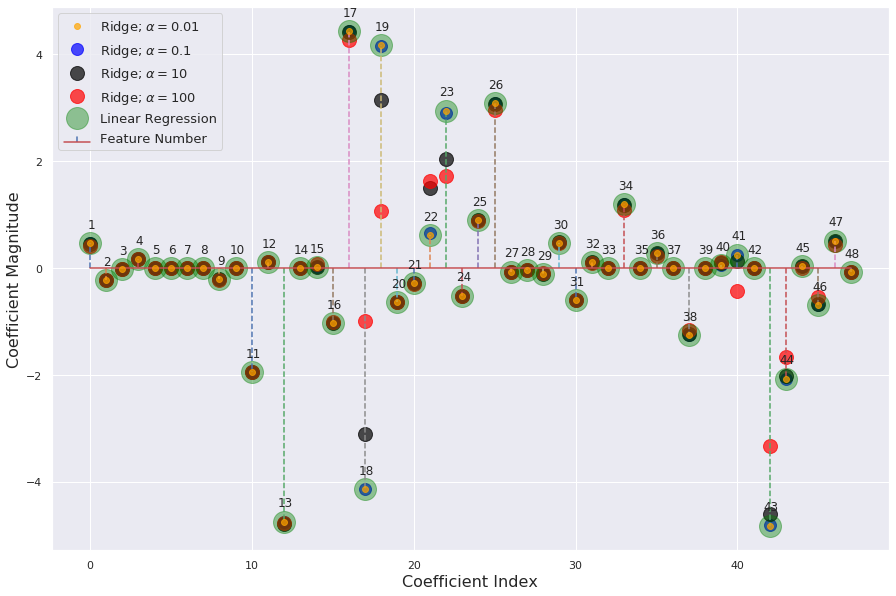

In [15]:
# Plotowanie wykresu Regresji Ridge dla kazdej z policzonych alph
plt.figure(figsize=(15,10))

# Zorder dla poszeregowania etykiet
y1 = lm1.coef_
plt.plot(y1, alpha=0.7,linestyle='none',marker='o',markersize=6,color='orange',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

# Alpha dla przejrzystosci
plt.plot(ridge01.coef_,alpha=0.7,linestyle='none',marker='o',markersize=12,color='blue',label=r'Ridge; $\alpha = 0.1$')
plt.plot(ridge10.coef_,alpha=0.7,linestyle='none',marker='o',markersize=14,color='black',label=r'Ridge; $\alpha = 10$') 
plt.plot(ridge100.coef_,alpha=0.7,linestyle='none',marker='o',markersize=14,color='red',label=r'Ridge; $\alpha = 100$') 
plt.plot(lm1.coef_,alpha=0.4,linestyle='none',marker='o',markersize=22,color='green',label='Linear Regression', )

# Etykiety z nazwami cech

x = np.arange(1,len(ridge01.coef_)+1)
y1 = lm1.coef_

for x,y in zip(x,y1):

    plt.annotate(x,                          # tekst
                 (x,y),                      # punkt do oznaczenia
                 textcoords="offset points", # typ pozycjonowania tekstu
                 xytext=(-15,15),            # dystans tekstu do punktu
                 ha='center')                # położenie horyzontalne left/right/center

# Pomocnicze pionowe linie.
plt.stem(y1, markerfmt=' ', linefmt='--', label='Feature Number')

# Etykiety osi
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=2)

plt.show()

Oś X - Indeks cech naszego modelu (feats_all - 48 kolumn)

Oś Y - wpływ cechy na model

    Im większa wartość współczynnkika alpha, tym bardziej "karamy" współczynniki.

W naszym modelu Ridge:
>Przy niskiej alphie (0.01 i 0.1) cechy pozostaja tak same jak przy regresji liowej.

>Przy wysokiej alphie (10, 100) wpływ cech zostaje zredukowany (punkty znajdują się bliżej 0)

Cecha nr 21 - przy alpha 10 i 100 wzrosla, jest to 'Opad_za_6_godzin_[mm]'. ????

---
### Regresja Lasso
Ridge przeprowadza Regularyzację L1

In [31]:
# Regresja Lasso dla różnych parametrów alpha

# alpha=0.01
lasso001 = Lasso(alpha=0.01,max_iter=10e3)
lasso001.fit(X_train,y_train)
results_lasso_cv001 = calc_results(lasso001)

# alpha=0.1
lasso01 = Lasso(alpha=0.1,max_iter=10e3)
lasso01.fit(X_train,y_train)
results_lasso_cv01 = calc_results(lasso01)

# alpha=1
lasso10 = Lasso(alpha=1,max_iter=10e3)
lasso10.fit(X_train,y_train)
results_lasso_cv10 = calc_results(lasso10)

# alpha=5
lasso100 = Lasso(alpha=5,max_iter=10e3)
lasso100.fit(X_train,y_train)
results_lasso_cv100 = calc_results(lasso100)

print('Lasso alpha = 0.01: {}\nLasso alpha = 0.1: {}\nLasso alpha = 10: {}\nLasso alpha = 100: {}'.format(results_lasso_cv001,results_lasso_cv01,results_lasso_cv10,results_lasso_cv100))


Lasso alpha = 0.01: {'r2': 0.551748476057476, 'mse': 137.43778149646093, 'mae': 6.63446362015122, 'r2_adj': 0.5510459562824657, 'r2-r2_adj': 0.0007025197750103462}
Lasso alpha = 0.1: {'r2': 0.5482613874594745, 'mse': 138.50304594479988, 'mae': 6.653829444142607, 'r2_adj': 0.5475534025637308, 'r2-r2_adj': 0.0007079848957437518}
Lasso alpha = 10: {'r2': 0.5257610387903288, 'mse': 145.40682476879846, 'mae': 6.8867733643912175, 'r2_adj': 0.5250177903449027, 'r2-r2_adj': 0.0007432484454260591}
Lasso alpha = 100: {'r2': 0.48750889043228585, 'mse': 157.14149273457923, 'mae': 6.811191509399835, 'r2_adj': 0.48670569151436216, 'r2-r2_adj': 0.0008031989179236865}


In [17]:
# Dodatkowe sprawdzenie dla niższej alphy.
#  alpha=0.005
lasso0001 = Lasso(alpha=0.005,max_iter=10e5)
lasso0001.fit(X_train,y_train)
results_lasso_cv0001 = calc_results(lasso0001)

In [18]:
results_lasso_cv0001

{'r2': 0.5517744519064293,
 'mse': 137.43099340498665,
 'mae': 6.63245839007223,
 'r2_adj': 0.5510719728419277,
 'r2-r2_adj': 0.0007024790645016044}

In [29]:
lasso0001.coef_

array([ 3.87781168e-01, -2.18909687e-01, -1.68001264e-02,  1.66776479e-01,
       -1.13083759e-04, -4.87744915e-04, -1.22739427e-03,  1.87549608e-05,
       -2.14380840e-01,  1.46764702e-03, -1.95342534e+00,  1.04643425e-01,
       -4.90538586e+00,  0.00000000e+00,  6.07432634e-02, -1.01984959e+00,
        4.36393660e+00, -0.00000000e+00,  7.61784556e-02, -6.39632478e-01,
       -2.87139405e-01,  4.36968345e-01,  2.96251132e+00, -5.18413103e-01,
        9.04991688e-01,  3.03532036e+00, -6.74874328e-02, -3.86993228e-02,
       -0.00000000e+00,  2.82972509e-01, -5.20487961e-01,  9.54336354e-02,
        0.00000000e+00,  1.08038202e+00,  0.00000000e+00,  2.75233775e-01,
        0.00000000e+00, -1.15751185e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -5.88009547e-03, -4.19357195e+00, -1.78993523e+00,
       -1.58641692e-02, -2.24697286e-02,  1.70387700e-01, -8.09953112e-02])

/home/john/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


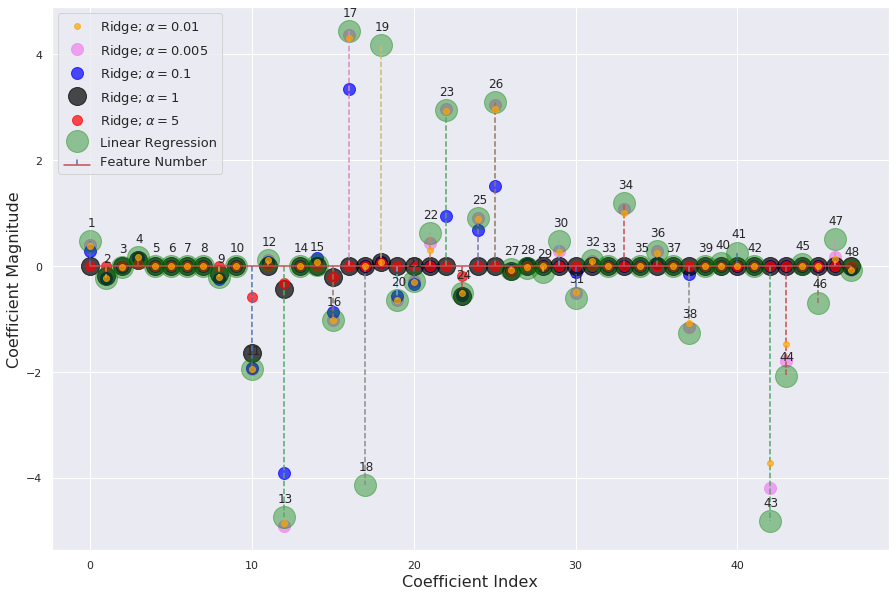

In [32]:
# Plotowanie wykresu Regresji Ridge dla kazdej z policzonych alph
plt.figure(figsize=(15,10))

# Zorder dla poszeregowania etykiet
plt.plot(lasso001.coef_, alpha=0.7,linestyle='none',marker='o',markersize=6,color='orange',label=r'Ridge; $\alpha = 0.01$',zorder=7) 

plt.plot(lasso0001.coef_,alpha=0.7,linestyle='none',marker='o',markersize=12,color='violet',label=r'Ridge; $\alpha = 0.005$') 

# Alpha dla przejrzystosci
plt.plot(lasso01.coef_,alpha=0.7,linestyle='none',marker='o',markersize=12,color='blue',label=r'Ridge; $\alpha = 0.1$') 
plt.plot(lasso10.coef_,alpha=0.7,linestyle='none',marker='o',markersize=18,color='black',label=r'Ridge; $\alpha = 1$') 
plt.plot(lasso100.coef_,alpha=0.7,linestyle='none',marker='o',markersize=10,color='red',label=r'Ridge; $\alpha = 5$') 
plt.plot(lm1.coef_,alpha=0.4,linestyle='none',marker='o',markersize=22,color='green',label='Linear Regression', )

# Etykiety z nazwami cech

x = np.arange(1,len(lasso01.coef_)+1)
y1 = lm1.coef_

for x,y in zip(x,y1):

    plt.annotate(x,                          # tekst
                 (x,y),                      # punkt do oznaczenia
                 textcoords="offset points", # typ pozycjonowania tekstu
                 xytext=(-15,15),            # dystans tekstu do punktu
                 ha='center')                # położenie horyzontalne left/right/center

# Pomocnicze pionowe linie.
plt.stem(y1, markerfmt=' ', linefmt='--', label='Feature Number')

# Etykiety osi
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=2)

plt.show()

Oś X - Indeks cech naszego modelu (feats_all - 48 kolumn)

Oś Y - wpływ cechy na model

    Im większa wartość współczynnkika alpha, tym bardziej "karamy" współczynniki.

W naszym modelu Lasso:
>Przy bardzo niskiej alphie (0.005) - cechy zostały nieznacznie zredukowane

>Przy niskiej alphie (0.01, 0.1) - cechy zostały trochę bardziej zredukowane

>Przy wysokiej alphie (1, 5) wpływ cechy zostaje kompletnie wyzerowany. Cecha przyjmuje wartość 0.

Jest to główna różnica pomiędzy Lasso a Ridge. Ridge obniża istotność cech ale nigdy nie osiągnie 0, natomiast Lasso zeruje cechy.

---
## Implementacja GridSearch w pipeline
* Tuningowanie hiperparametrów estymatora lasso bądź ridge za pomocą GridSearchCV - uwzględnia wszystkie kombinacje parametrów podanych i wybiera najlepsze.

* Alternatywna: RandomizedSearchCV - wybiera określoną liczbę wartosci parametrów z przestrzeni o określonym rozkładzie (zdefiniowana lista, wektor itd.)

In [21]:
# Tworzymy piepeline do Lasso
# max_iter - maksymalna liczba iteracji / default = 1000
lasso_estimator = make_pipeline(
    StandardScaler(),
    Lasso(max_iter=10e3)
)

lasso_estimator

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=10000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [22]:
# Tworzymy alpha_vec - liniowy wektor czyli wwatości do parametru alpha które grid search będzie testować
alpha_vec = np.linspace(0.01,10,100)

# GridSesarchCV z alhpa_vec oraz ocena neg_mean_squared_error
grid_mse = GridSearchCV(
    estimator = lasso_estimator,
    param_grid = {'lasso__alpha':alpha_vec},
    scoring = 'neg_mean_squared_error',
    cv=10
)

grid_mse.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True,
                                              max_iter=10000.0, normalize=False,
                                              positive=False, precompute=False,
                                              random_state=None,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False)...
        7.57818182,  7.67909091,  7.78      ,

In [23]:
# Wyswietlenie najlepszych parametrow (w tym przypadku tylko lasso__alpha) jakie znalazl GridSearchCV
grid_mse.best_params_

{'lasso__alpha': 0.01}

In [24]:
# Zbudować model na pełnych danych z wyznaczonym alpha z grid search
# Wrzucenie best_params_ do pipeline'a z Lasso
lasso = make_pipeline(
    StandardScaler(),
    Lasso(alpha = grid_mse.best_params_['lasso__alpha'])
)

lasso.fit(X_train,y_train)

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 262317.00948208803, tolerance: 940.8095597193301
  positive)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=0.01, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [25]:
calc_results(lasso)

/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 228196.47320057265, tolerance: 846.060028317488
  positive)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224555.1976256445, tolerance: 843.3989800015212
  positive)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235960.7835722142, tolerance: 841.5536385065344
  positive)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number 

{'r2': 0.5505642644719227,
 'mse': 137.80344780221154,
 'mae': 6.636284372318448,
 'r2_adj': 0.5498598887477137,
 'r2-r2_adj': 0.0007043757242090054}

In [28]:
train_test_score(lasso)

Train
MSE: 11.720818209999898
r2: 0.5520671972802668
 -----------------
Test
MSE: 11.916539837406924
r2: 0.546353504449366
